<a href="https://colab.research.google.com/github/Trading-com-Dados/codigos_videos/blob/main/20220313_Novos_aportes_na_carteira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulação de carteiras que levam em consideração novos aportes

Premissas:

1. Só faremos aportes em ativos que já estão na carteira
2. Novos aportes são feitos logo no início do pregão

# 0. Instalando e importando bibliotecas

In [1]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 5.8 MB/s 
     |████████████████████████████████| 63 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import yfinance as yf

In [3]:
import pandas as pd
import numpy as np

# 1. Criação da carteira de referência

Como referência, assista ao vídeo: https://youtu.be/AzIXSFZOSrw

In [4]:
ativos = ['PETR4.SA','VALE3.SA', 'WEGE3.SA', 
          'RADL3.SA', 'OIBR3.SA','AAPL34.SA','IVVB11.SA']

In [5]:
inicio = '2020-05-01'
fim = '2022-03-11'

In [6]:
precos = yf.download(ativos, start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  7 of 7 completed


Dicionário contendo as alocações iniciais no primeiro dia

In [8]:
compras = {'PETR4.SA': 2500, 'VALE3.SA': 2300, 'WEGE3.SA': 2000, 
           'RADL3.SA': 1700, 'OIBR3.SA': 1500, 'AAPL34.SA': 1100, 'IVVB11.SA': 900}

In [9]:
compras_df = pd.Series(data = compras, index = list(compras.keys()) )

In [10]:
sum(compras.values())

12000

Preço dos ativos no primeiro dia do investimento

In [11]:
primeiro = precos.iloc[0]

In [12]:
primeiro

AAPL34.SA     39.877621
IVVB11.SA    169.199997
OIBR3.SA       0.680000
PETR4.SA      14.126041
RADL3.SA      20.637646
VALE3.SA      34.517658
WEGE3.SA      19.485765
Name: 2020-05-04 00:00:00, dtype: float64

Quantidade de papéis comprados de cada ativo

In [14]:
qtd_acoes = compras_df/primeiro

Dataframe que contém a posição diária de cada ativo

In [15]:
PL = precos*qtd_acoes

In [16]:
PL.head()

,AAPL34.SA,IVVB11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,
2020-05-04,1100.000000,900.000000,1500.000000,2500.000000,1700.000000,2300.000000,2000.000000
2020-05-05,1132.653031,916.170259,1544.117605,2580.552703,1692.683606,2287.958586,1958.333240
2020-05-06,1175.442177,928.989346,1544.117605,2485.615938,1683.090923,2320.942650,1949.297353
2020-05-07,1210.000116,973.404273,1477.941198,2508.630876,1685.854897,2410.995130,1962.349037
2020-05-08,1221.059801,961.436188,1522.058802,2658.228053,1701.951059,2557.591901,1919.678768


In [17]:
PL['PL Total'] = PL.sum(axis = 1)

In [18]:
PL.head()

,AAPL34.SA,IVVB11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,
2020-05-04,1100.000000,900.000000,1500.000000,2500.000000,1700.000000,2300.000000,2000.000000,12000.000000
2020-05-05,1132.653031,916.170259,1544.117605,2580.552703,1692.683606,2287.958586,1958.333240,12112.469028
2020-05-06,1175.442177,928.989346,1544.117605,2485.615938,1683.090923,2320.942650,1949.297353,12087.495991
2020-05-07,1210.000116,973.404273,1477.941198,2508.630876,1685.854897,2410.995130,1962.349037,12229.175526
2020-05-08,1221.059801,961.436188,1522.058802,2658.228053,1701.951059,2557.591901,1919.678768,12542.004572


In [19]:
PL.tail()

,AAPL34.SA,IVVB11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,
2022-03-04,2269.643902,1271.808566,1852.941099,6057.960355,1959.671278,6542.974231,3234.155753,23189.155185
2022-03-07,2232.129110,1244.680874,1742.647088,5627.903513,1888.006057,6741.887720,3190.020940,22667.275302
2022-03-08,2194.062722,1225.531905,1808.823495,5744.709034,1850.937813,6446.083719,3240.314040,22510.462726
2022-03-09,2261.644403,1244.680874,1875.000033,5762.407249,1897.890975,6276.121171,3353.216813,22670.961517
2022-03-10,2184.408226,1241.489352,1852.941099,5964.162177,1841.876809,6483.348479,3255.709855,22823.935997


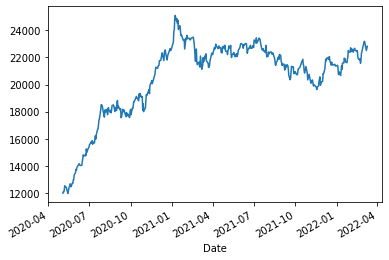

In [22]:
PL['PL Total'].plot();

In [23]:
# Criando função que recebe carteira e compara com o IBOV

def comparaibov(i, f, carteira, largura,altura,nome):
   import matplotlib.pyplot as plt
   ibov = pd.DataFrame(yf.download('^BVSP', start = i, end =  f, progress=False)['Adj Close'].rename('IBOV', inplace = True))
   consolidado = pd.merge(ibov, carteira, how = 'inner', on = 'Date')
   consolidado_adj = consolidado/consolidado.iloc[0]
   comparativo = consolidado_adj[['IBOV', 'PL Total']]
   comparativo.plot(figsize = (largura,altura))
   plt.legend(["IBOV", str(nome)]);

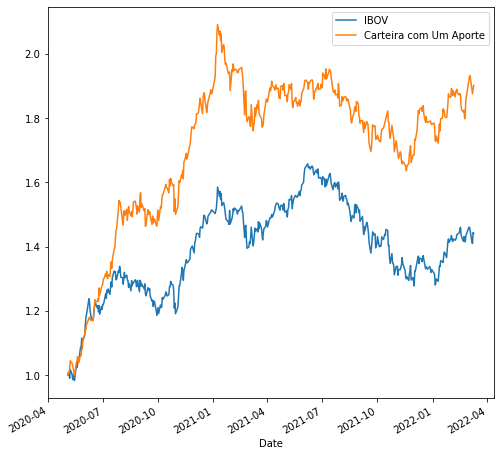

In [24]:
comparaibov(inicio, fim, PL, 8, 8, 'Carteira com Um Aporte')

# 2. Reformular a carteira considerando novo aporte

Quando foi o novo aporte?

In [26]:
data_aporte = '2021-09-14'

Quanto nossa carteira tinha nesse dia?

In [27]:
PL.loc[data_aporte]

AAPL34.SA     2148.324088
IVVB11.SA     1351.063854
OIBR3.SA      2227.941132
PETR4.SA      4077.224912
RADL3.SA      2126.490790
VALE3.SA      5469.220632
WEGE3.SA      4008.407078
PL Total     21408.672485
Name: 2021-09-14 00:00:00, dtype: float64

Determine os novos aportes

In [28]:
segunda_compra = {'OIBR3.SA': 6000, 'RADL3.SA': 2000, 'VALE3.SA': 1000}

In [30]:
segunda_compra_df = pd.Series(data = segunda_compra, index = list(segunda_compra.keys()) )

In [31]:
sum(segunda_compra.values())

9000

Preço dos ativos no dia do aporte

In [32]:
precos_segundo_aporte = precos.loc[data_aporte]

In [33]:
precos_segundo_aporte

AAPL34.SA     77.881866
IVVB11.SA    254.000000
OIBR3.SA       1.010000
PETR4.SA      23.038019
RADL3.SA      25.815155
VALE3.SA      82.080299
WEGE3.SA      39.053440
Name: 2021-09-14 00:00:00, dtype: float64

Número de papéis comprados no segundo aporte

In [35]:
qtd_acoes_segundo = segunda_compra_df/precos_segundo_aporte

In [36]:
qtd_acoes_segundo

AAPL34.SA            NaN
IVVB11.SA            NaN
OIBR3.SA     5940.594115
PETR4.SA             NaN
RADL3.SA       77.473871
VALE3.SA       12.183191
WEGE3.SA             NaN
dtype: float64

Vamos criar um data frame novo exclusivo para o novo aporte. As operações serão consideradas separadamente, e depois vamos juntar com a carteira original.

In [38]:
novo_PL = pd.DataFrame(data = None, index = precos.index, columns = precos.columns)

In [39]:
novo_PL.head()

,AAPL34.SA,IVVB11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,
2020-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Qual a variação de patrimônio para as novas posições montadas?

In [41]:
novos_PL = precos*qtd_acoes_segundo

In [42]:
novos_PL.head()

,AAPL34.SA,IVVB11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,
2020-05-04,NaN,NaN,4039.604041,NaN,1598.878310,420.535238,NaN
2020-05-05,NaN,NaN,4158.415810,NaN,1591.997119,418.333569,NaN
2020-05-06,NaN,NaN,4158.415810,NaN,1582.975041,424.364422,NaN
2020-05-07,NaN,NaN,3980.198157,NaN,1585.574605,440.829744,NaN
2020-05-08,NaN,NaN,4099.009926,NaN,1600.713314,467.633704,NaN


Vamos preencher os NaN com zeros

In [43]:
novos_PL = novos_PL.fillna(0)

O que houve antes do aporte deve ser zero

In [44]:
novos_PL[novos_PL.index < data_aporte] = 0

In [45]:
novos_PL.head()

,AAPL34.SA,IVVB11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,
2020-05-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
novos_PL.tail()

,AAPL34.SA,IVVB11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,
2022-03-04,0.0,0.0,4990.098901,0.0,1843.103471,1196.326620,0.0
2022-03-07,0.0,0.0,4693.069479,0.0,1775.701138,1232.696242,0.0
2022-03-08,0.0,0.0,4871.287132,0.0,1740.837836,1178.611022,0.0
2022-03-09,0.0,0.0,5049.505140,0.0,1784.998067,1147.534831,0.0
2022-03-10,0.0,0.0,4990.098901,0.0,1732.315811,1185.424563,0.0


Agora precisamos somar a carteira original com as operações após aporte

In [47]:
carteira_full = pd.concat([PL, novos_PL], axis = 1)

In [48]:
carteira_full.head()

,AAPL34.SA,IVVB11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total,AAPL34.SA,IVVB11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,
2020-05-04,1100.000000,900.000000,1500.000000,2500.000000,1700.000000,2300.000000,2000.000000,12000.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-05,1132.653031,916.170259,1544.117605,2580.552703,1692.683606,2287.958586,1958.333240,12112.469028,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-06,1175.442177,928.989346,1544.117605,2485.615938,1683.090923,2320.942650,1949.297353,12087.495991,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-07,1210.000116,973.404273,1477.941198,2508.630876,1685.854897,2410.995130,1962.349037,12229.175526,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-08,1221.059801,961.436188,1522.058802,2658.228053,1701.951059,2557.591901,1919.678768,12542.004572,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
carteira_full = carteira_full.groupby(lambda x:x, axis = 1).sum()

In [51]:
carteira_full.head()

,AAPL34.SA,IVVB11.SA,OIBR3.SA,PETR4.SA,PL Total,RADL3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,
2020-05-04,1100.000000,900.000000,1500.000000,2500.000000,12000.000000,1700.000000,2300.000000,2000.000000
2020-05-05,1132.653031,916.170259,1544.117605,2580.552703,12112.469028,1692.683606,2287.958586,1958.333240
2020-05-06,1175.442177,928.989346,1544.117605,2485.615938,12087.495991,1683.090923,2320.942650,1949.297353
2020-05-07,1210.000116,973.404273,1477.941198,2508.630876,12229.175526,1685.854897,2410.995130,1962.349037
2020-05-08,1221.059801,961.436188,1522.058802,2658.228053,12542.004572,1701.951059,2557.591901,1919.678768


In [54]:
carteira_full.drop('PL Total', axis = 1, inplace = True)

In [55]:
carteira_full.head()

,AAPL34.SA,IVVB11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,
2020-05-04,1100.000000,900.000000,1500.000000,2500.000000,1700.000000,2300.000000,2000.000000
2020-05-05,1132.653031,916.170259,1544.117605,2580.552703,1692.683606,2287.958586,1958.333240
2020-05-06,1175.442177,928.989346,1544.117605,2485.615938,1683.090923,2320.942650,1949.297353
2020-05-07,1210.000116,973.404273,1477.941198,2508.630876,1685.854897,2410.995130,1962.349037
2020-05-08,1221.059801,961.436188,1522.058802,2658.228053,1701.951059,2557.591901,1919.678768


In [56]:
carteira_full['PL Total'] = carteira_full.sum(axis = 1)

In [57]:
carteira_full.head()

,AAPL34.SA,IVVB11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,
2020-05-04,1100.000000,900.000000,1500.000000,2500.000000,1700.000000,2300.000000,2000.000000,12000.000000
2020-05-05,1132.653031,916.170259,1544.117605,2580.552703,1692.683606,2287.958586,1958.333240,12112.469028
2020-05-06,1175.442177,928.989346,1544.117605,2485.615938,1683.090923,2320.942650,1949.297353,12087.495991
2020-05-07,1210.000116,973.404273,1477.941198,2508.630876,1685.854897,2410.995130,1962.349037,12229.175526
2020-05-08,1221.059801,961.436188,1522.058802,2658.228053,1701.951059,2557.591901,1919.678768,12542.004572


In [58]:
carteira_full.tail()

,AAPL34.SA,IVVB11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,
2022-03-04,2269.643902,1271.808566,6843.040000,6057.960355,3802.774748,7739.300851,3234.155753,31218.684177
2022-03-07,2232.129110,1244.680874,6435.716567,5627.903513,3663.707195,7974.583962,3190.020940,30368.742161
2022-03-08,2194.062722,1225.531905,6680.110627,5744.709034,3591.775649,7624.694741,3240.314040,30301.198717
2022-03-09,2261.644403,1244.680874,6924.505173,5762.407249,3682.889042,7423.656002,3353.216813,30652.999554
2022-03-10,2184.408226,1241.489352,6843.040000,5964.162177,3574.192620,7668.773043,3255.709855,30731.775272


In [59]:
PL.tail()

,AAPL34.SA,IVVB11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,
2022-03-04,2269.643902,1271.808566,1852.941099,6057.960355,1959.671278,6542.974231,3234.155753,23189.155185
2022-03-07,2232.129110,1244.680874,1742.647088,5627.903513,1888.006057,6741.887720,3190.020940,22667.275302
2022-03-08,2194.062722,1225.531905,1808.823495,5744.709034,1850.937813,6446.083719,3240.314040,22510.462726
2022-03-09,2261.644403,1244.680874,1875.000033,5762.407249,1897.890975,6276.121171,3353.216813,22670.961517
2022-03-10,2184.408226,1241.489352,1852.941099,5964.162177,1841.876809,6483.348479,3255.709855,22823.935997


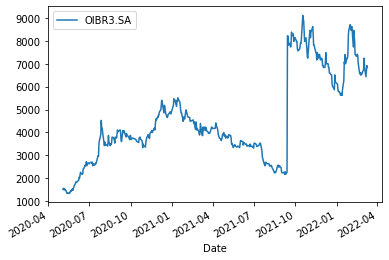

In [60]:
carteira_full[['OIBR3.SA']].plot();

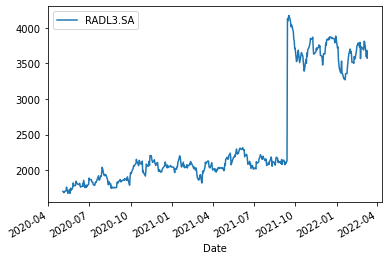

In [61]:
carteira_full[['RADL3.SA']].plot();

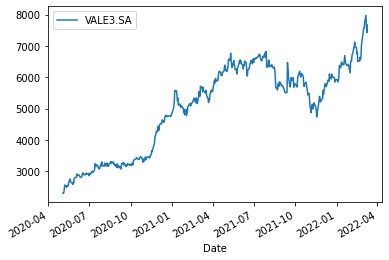

In [62]:
carteira_full[['VALE3.SA']].plot();

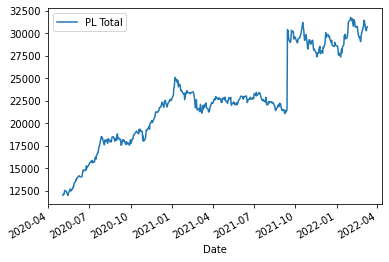

In [64]:
carteira_full[['PL Total']].plot();

# 3. Cálculo dos retornos diários e da rentabilidade acumulada da carteira

Vamos agora para o cálculo dos retornos diários. 

Só que esse cálculo não pode ser feito da forma tradicional, ou seja, considerando simplesmente o retorno de um dia para o outro. Isso porque o retorno do dia quando houve o aporte será distorcido se calcularmos utilizando o valor do aporte. Para que o cálculo seja feito corretamente, precisaremos separar os dataframes em dois momentos: antes e depois do aporte.

In [66]:
carteira_full.drop(['PL Total'], axis = 1, inplace = True)

Dividindo o cálculo da rentabilidade em antes e depois do aportea

In [67]:
antes_aporte = carteira_full[carteira_full.index < data_aporte]
depois_aporte = carteira_full[carteira_full.index >= data_aporte]

In [68]:
antes_aporte['PL Total'] = antes_aporte.sum(axis = 1)
depois_aporte['PL Total'] = depois_aporte.sum(axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [69]:
antes_aporte.tail()

,AAPL34.SA,IVVB11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,
2021-09-06,2244.887145,1363.031939,2249.999934,4168.600092,2139.576777,5641.859727,3703.043602,21510.999216
2021-09-08,2266.896028,1390.957472,2161.764725,3933.860254,2075.782098,5524.442408,3714.240380,21067.943364
2021-09-09,2223.153743,1361.702152,2272.058737,4017.358496,2113.404802,5504.678659,3953.441966,21445.798555
2021-09-10,2154.376483,1361.702152,2161.764725,3992.151620,2089.686185,5511.072888,3935.119609,21205.873662
2021-09-13,2143.647208,1344.946865,2249.999934,4132.365165,2132.215919,5508.166559,3959.549157,21470.890807


In [70]:
depois_aporte.head()

,AAPL34.SA,IVVB11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,
2021-09-14,2148.324088,1351.063854,8227.941132,4077.224912,4126.490790,6469.220632,4008.407078,30408.672485
2021-09-15,2145.022724,1359.840418,8227.941132,4148.119716,4097.923054,6307.645090,4055.229400,30341.721533
2021-09-16,2157.677847,1363.563887,7983.547072,4111.884789,4142.361889,6045.686377,4061.336983,29866.058844
2021-09-17,2119.437626,1353.829834,7820.617213,3927.558704,4175.691016,5923.301036,3989.067118,29309.502545
2021-09-20,2101.280439,1342.712751,7902.082385,3883.446501,4118.555545,5689.531438,3958.530770,28996.139829


Configurando posição imediatamente antes do aporte

In [71]:
from datetime import datetime, timedelta

In [78]:
dia_antes_aporte = (datetime.strptime(data_aporte, '%Y-%m-%d') - timedelta(1)).strftime('%Y-%m-%d')

In [79]:
dia_antes_aporte

'2021-09-13'

Qual era o tamanho da nossa posição no dia imediatamente após o aporte?

In [81]:
antes_aporte.loc[dia_antes_aporte]

AAPL34.SA     2143.647208
IVVB11.SA     1344.946865
OIBR3.SA      2249.999934
PETR4.SA      4132.365165
RADL3.SA      2132.215919
VALE3.SA      5508.166559
WEGE3.SA      3959.549157
PL Total     21470.890807
Name: 2021-09-13 00:00:00, dtype: float64

Transformando isso em um data frame transposto

In [83]:
posicao_original = pd.DataFrame(antes_aporte.loc[dia_antes_aporte]).T

In [84]:
segunda_compra_df

OIBR3.SA    6000
RADL3.SA    2000
VALE3.SA    1000
dtype: int64

In [87]:
aportes  = pd.DataFrame(segunda_compra_df, columns = [dia_antes_aporte]).T
aportes.index = pd.to_datetime(aportes.index)

In [90]:
operacoes = pd.concat([posicao_original, aportes], axis = 1)

In [91]:
operacoes = operacoes.groupby(lambda x:x, axis = 1).sum()

In [92]:
operacoes.drop('PL Total', axis = 1, inplace = True)
operacoes['PL Total'] = operacoes.sum(axis = 1)

In [94]:
operacoes

,AAPL34.SA,IVVB11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
2021-09-13,2143.647208,1344.946865,8249.999934,4132.365165,4132.215919,6508.166559,3959.549157,30470.890807


 Agora vamos anexar a linha acima ao data frame "depois_aporte"

In [96]:
depois_aporte = pd.concat([operacoes, depois_aporte], axis = 0)

In [97]:
rentabilidade_antes_aporte = antes_aporte.pct_change()
rentabilidade_depois_aporte = depois_aporte.pct_change()

In [100]:
rentabilidade_antes_aporte.tail()

,AAPL34.SA,IVVB11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,
2021-09-06,0.018218,-0.000975,0.009901,0.004937,0.002683,-0.015718,0.003586,0.000476
2021-09-08,0.009804,0.020488,-0.039216,-0.056311,-0.029816,-0.020812,0.003024,-0.020597
2021-09-09,-0.019296,-0.021033,0.051020,0.021226,0.018125,-0.003578,0.064401,0.017935
2021-09-10,-0.030937,0.000000,-0.048544,-0.006274,-0.011223,0.001162,-0.004635,-0.011188
2021-09-13,-0.004980,-0.012305,0.040816,0.035122,0.020352,-0.000527,0.006208,0.012497


In [99]:
rentabilidade_depois_aporte.head()

,AAPL34.SA,IVVB11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
2021-09-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-14,0.002182,0.004548,-0.002674,-0.013344,-0.001385,-0.005984,0.012339,-0.002042
2021-09-15,-0.001537,0.006496,0.000000,0.017388,-0.006923,-0.024976,0.011681,-0.002202
2021-09-16,0.005900,0.002738,-0.029703,-0.008735,0.010844,-0.041530,0.001506,-0.015677
2021-09-17,-0.017723,-0.007139,-0.020408,-0.044828,0.008046,-0.020243,-0.017795,-0.018635


In [101]:
rentabilidade_antes_aporte = rentabilidade_antes_aporte.dropna()
rentabilidade_depois_aporte = rentabilidade_depois_aporte.dropna()

In [102]:
rentabilidade_total = pd.concat([rentabilidade_antes_aporte, rentabilidade_depois_aporte], axis = 0)

In [103]:
rentabilidade_total.head()

,AAPL34.SA,IVVB11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
2020-05-05,0.029685,0.017967,0.029412,0.032221,-0.004304,-0.005235,-0.020833,0.009372
2020-05-06,0.037778,0.013992,0.000000,-0.036789,-0.005667,0.014416,-0.004614,-0.002062
2020-05-07,0.029400,0.047810,-0.042857,0.009259,0.001642,0.038800,0.006696,0.011721
2020-05-08,0.009140,-0.012295,0.029851,0.059633,0.009548,0.060803,-0.021744,0.025581
2020-05-11,0.034970,0.014661,-0.057971,-0.017857,0.003057,-0.022927,0.015429,-0.008190


In [104]:
retorno_acumulado = (1 + rentabilidade_total).cumprod()

In [107]:
retorno_acumulado['Date'] = pd.to_datetime(retorno_acumulado.index)
retorno_acumulado.index = retorno_acumulado['Date']
retorno_acumulado.drop(['Date'], axis = 1, inplace = True)

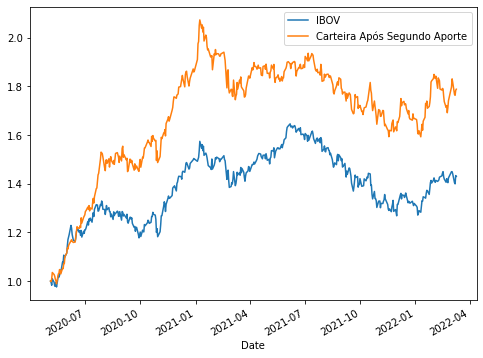

In [108]:
comparaibov(inicio, fim, retorno_acumulado, 8, 6, 'Carteira Após Segundo Aporte')

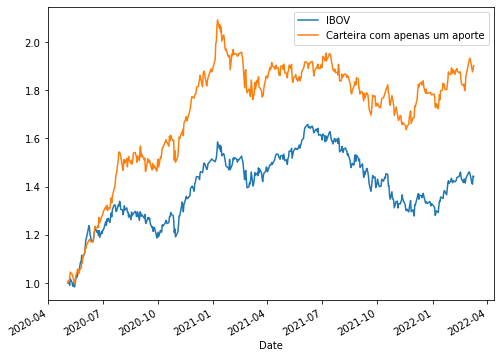

In [109]:
comparaibov(inicio, fim, PL, 8, 6, 'Carteira com apenas um aporte')

# 4. Funções para análise rápida

Parâmetros da função

* data_aporte: a data em que o novo aporte foi feito (considerando a premissa de que o aporte é feito no final do pregão)
* dic_aportes: um dicionário contendo os aportes feitos, com o ticker e a quantidade comprada (em R$)
* precos: um data frame contendo as cotações dos ativos no período analisado
* carteira_anterior: um data frame contendo a variação da posição dos ativos dia após dia, sem os novos aportes

In [111]:
def configuraaportes(data_aporte, dic_aportes, precos, carteira_anterior):
  
  # Novos aportes em formato de dataframe                  
  nova_compra_df = pd.Series(data=dic_aportes, index=list(dic_aportes.keys()))

  # Preço dos ativos no dia do novo aporte
  precos_novo_aporte = precos.loc[data_aporte]

  # Quantidade de papéis comprados no novo aporte
  qtd_acoes_nova_compra = nova_compra_df/precos_novo_aporte

  # Configura novo dataframe que vai conter informações exclusivamente do novo aporte
  novos_PL = pd.DataFrame(data= None, index = precos.index, columns= precos.columns)

  # Oscilação do patrimônio dos ativos comprados no novo aporte
  novos_PL = precos*qtd_acoes_nova_compra

  novos_PL = novos_PL.fillna(0)

  # Configura como zero os valores dos ativos antes do segundo aporte
  # Ou seja: os papéis do segundo aporte na prática não existiam, portanto
  # precisam ser configurados como zero. Lembrando que o patrimônio da carteira 
  # inicial está descrito pelo data frame "carteira_anterior".
  novos_PL[novos_PL.index < data_aporte] = 0

  # Carteira original + novo aporte
  carteira_full = pd.concat([carteira_anterior, novos_PL], axis = 1)

  # Somando colunas de mesmo nome, para agrupar os patrimônios antes e depois do aporte
  carteira_full = carteira_full.groupby(lambda x:x, axis=1).sum()

  # Rentabilidade antes e depois do aporte
  antes_aporte = carteira_full[carteira_full.index<data_aporte]
  depois_aporte = carteira_full[carteira_full.index>=data_aporte]

  # Variação de patrimônio antes e depois do aporte
  antes_aporte['PL Total'] = antes_aporte.sum(axis = 1)
  depois_aporte['PL Total'] = depois_aporte.sum(axis = 1)

  # Encontrando o dia imediatamente antes do aporte
  dia_antes_aporte = (datetime.strptime(data_aporte, '%Y-%m-%d')- timedelta(1)).strftime('%Y-%m-%d')

  # Configurando momento logo após o aporte
  # A ideia é que a rentabilidade do dia do aporte seja calculada com relação à posição logo antes do aporte
  # somada dos valores aportados. Perceba que isto é diferente de calcular a rentabilidade com relação à posição 
  # do dia anterior ao aporte. Isto geraria uma distorção considerável no cálculo de rentabilidade.
  posicao_original = pd.DataFrame(antes_aporte.loc[dia_antes_aporte]).T

  aportes = (pd.DataFrame(nova_compra_df,columns = [dia_antes_aporte])).T.apply(pd.to_numeric)
  aportes.index =  pd.to_datetime(aportes.index)

  # Posição logo antes do aporte
  operations = pd.concat([posicao_original,aportes], axis = 1)
  operations = operations.groupby(lambda x:x, axis=1).sum()
  operations.drop(['PL Total'], axis=1, inplace=True)
  operations['PL Total'] = operations.iloc[:].sum(axis = 1)

  # Agora sim, vamos juntar a linha contendo a operação de aporte com o data frame da carteira após o aporte
  depois_aporte = pd.concat([operations, depois_aporte], axis = 0)

  # Retorno diário da carteira antes e depois do aporte
  rentabilidade_antes_aporte = antes_aporte.pct_change()
  rentabilidade_depois_aporte = depois_aporte.pct_change()

  rentabilidade_antes_aporte = rentabilidade_antes_aporte.dropna()
  rentabilidade_depois_aporte = rentabilidade_depois_aporte.dropna()

  # Juntando tudo num data frame só
  rentabilidade_total = pd.concat([rentabilidade_antes_aporte, rentabilidade_depois_aporte], axis = 0)

  # Calculando a rentabilidade acumulada e fazendo alguns ajustes
  cum_daily_return = (1 + rentabilidade_total).cumprod()
  cum_daily_return['Date'] = pd.to_datetime(cum_daily_return.index)
  cum_daily_return.index = cum_daily_return['Date']
  cum_daily_return.drop(['Date'], axis = 1, inplace = True)

  return cum_daily_return;

In [114]:
novos_aportes = {'VALE3.SA' : 1000000, 'AAPL34.SA' : 200000}

In [115]:
PL.head()

,AAPL34.SA,IVVB11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,
2020-05-04,1100.000000,900.000000,1500.000000,2500.000000,1700.000000,2300.000000,2000.000000,12000.000000
2020-05-05,1132.653031,916.170259,1544.117605,2580.552703,1692.683606,2287.958586,1958.333240,12112.469028
2020-05-06,1175.442177,928.989346,1544.117605,2485.615938,1683.090923,2320.942650,1949.297353,12087.495991
2020-05-07,1210.000116,973.404273,1477.941198,2508.630876,1685.854897,2410.995130,1962.349037,12229.175526
2020-05-08,1221.059801,961.436188,1522.058802,2658.228053,1701.951059,2557.591901,1919.678768,12542.004572


In [116]:
PL.drop('PL Total', axis = 1, inplace = True)

In [117]:
aporte_vale_apple = configuraaportes(data_aporte, novos_aportes, precos, PL)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[*********************100%***********************]  1 of 1 completed


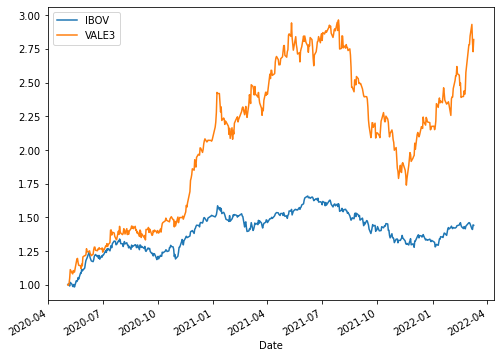

In [122]:
comparaacao('VALE3', inicio, fim, 'VALE3')

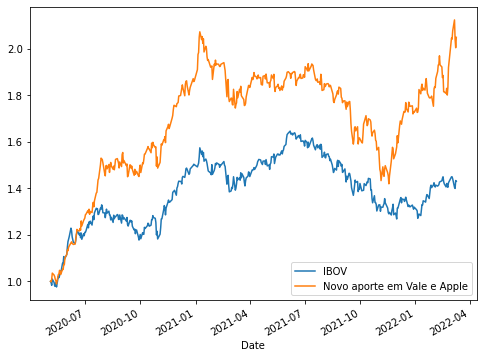

In [128]:
comparaibov(inicio, fim, aporte_vale_apple, 8, 6, 'Novo aporte em Vale e Apple')

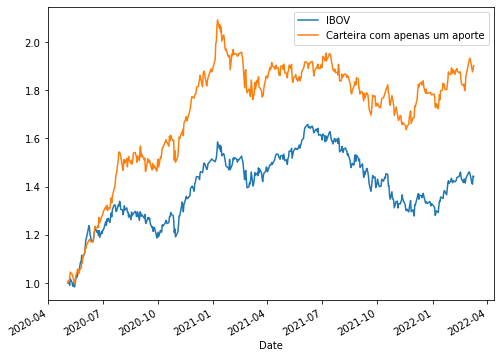

In [120]:
PL['PL Total'] = PL.sum(axis = 1)
comparaibov(inicio, fim, PL, 8, 6, 'Carteira com apenas um aporte')

Compara algum papel ao IBOV

In [121]:
# Compara ação com o IBOV

def comparaacao(papel, i, f, nome):
  ativo = papel + '.SA'
  data = yf.download(ativo, start = i, end = f)
  data.rename(columns = {'Adj Close':'PL Total'}, inplace = True)
  return comparaibov(inicio, fim, data,8,6,nome);